In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight")

Skipping, found downloaded files in ".\male-female-height-and-weight" (use force=True to force download)


In [4]:
data = pd.read_csv("D:\Data Science\Deep_Learning\male-female-height-and-weight\Test set.csv")
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\tinus\AppData\Local\Temp\ipykernel_23624\2458190220.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("D:\Data Science\Deep_Learning\male-female-height-and-weight\Test set.csv")


,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


In [5]:
data.loc[data['Sex']=='Male', 'Sex']=1
data.loc[data['Sex']=='Female', 'Sex']=0
data.head()

,Height,Weight,Sex
0,146.323241,59.861065,0
1,175.695412,77.863687,1
2,183.216164,72.131992,1
3,184.245269,77.546000,1
4,132.302261,55.188496,0


In [6]:
X = data.drop(['Sex'], axis=1)
y = data['Sex']

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X)
X = pd.DataFrame(x_scaled, columns=['Height','Weight'])

In [36]:
X.head()

,Height,Weight
0,0.305685,0.265457
1,0.690767,0.455592
2,0.789367,0.395057
3,0.802859,0.452237
4,0.121865,0.216108


In [37]:
y = y.astype('int')

In [38]:
X[:5], y[:5]

(     Height    Weight
 0  0.305685  0.265457
 1  0.690767  0.455592
 2  0.789367  0.395057
 3  0.802859  0.452237
 4  0.121865  0.216108,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Sex, dtype: int32)

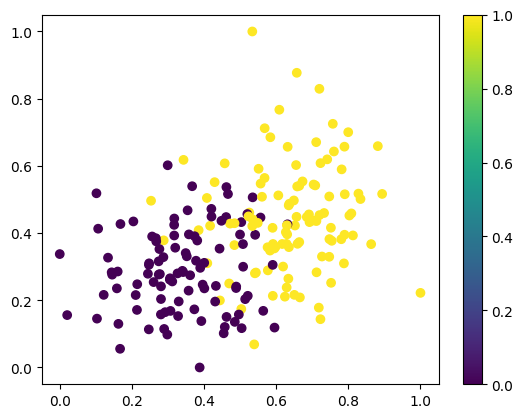

In [39]:

plt.scatter(X['Height'], X['Weight'], c=y)
plt.colorbar()
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [41]:
data.shape,
#X_train.shape, X_test.shape

((205, 3),)

### Model Building

In [42]:
# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics = ['accuracy'])

# train model
epoch_number = 20
history = model.fit(X_train,y_train, epochs = epoch_number)

Epoch 1/20


C:\Users\tinus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5595 - loss: 0.6860  
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5475 - loss: 0.6480 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6275 - loss: 0.6157 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7516 - loss: 0.5779 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8022 - loss: 0.5105 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8741 - loss: 0.4708 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8367 - loss: 0.4206 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8501 - loss: 0.3840 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8495 - loss: 0.3462 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8200 - loss: 0.3113 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8380 - loss: 0.3608 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8654 - loss: 0.2947 
Epoch 13/20

In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,749 (14.65 KB)

 Trainable params: 1,249 (4.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,500 (9.77 KB)

### Model Evaluate

In [44]:
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9141 - loss: 0.2568 


[0.2694832980632782, 0.9024389982223511]

In [45]:
y_pred = model.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002589B79BE20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [46]:
y_pred[:5], y_test[:5]

(array([[0.14416626],
        [0.96916044],
        [0.98569894],
        [0.24852766],
        [0.95944434]], dtype=float32),
 15     0
 9      1
 100    1
 132    0
 68     1
 Name: Sex, dtype: int32)

In [47]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,y_pred)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8636364>

In [48]:
# recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test,y_pred)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>

In [49]:
history.history

{'accuracy': [0.5731707215309143,
  0.5548780560493469,
  0.6585366129875183,
  0.75,
  0.7804877758026123,
  0.8597561120986938,
  0.8292682766914368,
  0.8658536672592163,
  0.8597561120986938,
  0.8414633870124817,
  0.8536585569381714,
  0.8658536672592163,
  0.8475610017776489,
  0.8719512224197388,
  0.8719512224197388,
  0.8414633870124817,
  0.8841463327407837,
  0.8841463327407837,
  0.8414633870124817,
  0.8719512224197388],
 'loss': [0.6805647611618042,
  0.6427075862884521,
  0.6091398000717163,
  0.567109227180481,
  0.521026074886322,
  0.4673108458518982,
  0.4222731590270996,
  0.3740615248680115,
  0.3380865752696991,
  0.3130413591861725,
  0.34466755390167236,
  0.29549095034599304,
  0.2889278829097748,
  0.2878403663635254,
  0.2807042598724365,
  0.2894004285335541,
  0.28741851449012756,
  0.2823612689971924,
  0.29974156618118286,
  0.2825600802898407]}

<Axes: >

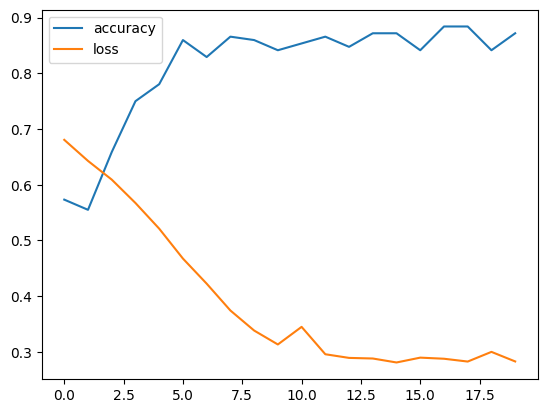

In [50]:
pd.DataFrame(history.history).plot()

Two Classes

In [52]:
# create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

# compile model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics = ['accuracy'])

# train model
epoch_number = 20
history = model_2.fit(X_train,y_train, epochs = epoch_number)

Epoch 1/20


C:\Users\tinus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4510 - loss: 0.6948  
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4678 - loss: 0.6683 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5224 - loss: 0.6380 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6131 - loss: 0.5844 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6838 - loss: 0.5564 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7823 - loss: 0.5280 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8064 - loss: 0.4814 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8294 - loss: 0.4087 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8330 - loss: 0.3797 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8397 - loss: 0.3403 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8413 - loss: 0.3427 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8860 - loss: 0.3011 
Epoch 13/20

In [53]:
model_2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,800 (14.85 KB)

 Trainable params: 1,266 (4.95 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,534 (9.90 KB)

In [55]:
model_2.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8979 - loss: 0.3058 


[0.3168586492538452, 0.8780487775802612]

In [57]:
y_pred2 = model_2.predict(X_test)
y_pred2[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.78424656, 0.2157534 ],
       [0.01733033, 0.9826697 ],
       [0.01000773, 0.9899922 ],
       [0.5663778 , 0.43362215],
       [0.02950011, 0.9704999 ]], dtype=float32)

In [59]:
import numpy as np
y_pred2=np.argmax(y_pred2, axis=1)
y_pred2[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [58]:
y_test[:5]

15     0
9      1
100    1
132    0
68     1
Name: Sex, dtype: int32

In [60]:
# Precision
precision = tf.keras.metrics.Precision()
precision.update_state(y_test,y_pred2)
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.82608694>

In [61]:
# recall
recall = tf.keras.metrics.Recall()
recall.update_state(y_test,y_pred2)
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.95>